In [2]:
import pandas as pd
# Read the fourth and fifth sheets of the Excel file
df_sheet3 = pd.read_excel("./Downloads/MorphoLEX_en.xlsx", sheet_name=2)
df_sheet4 = pd.read_excel("./Downloads/MorphoLEX_en.xlsx", sheet_name=3)
df_sheet5 = pd.read_excel("./Downloads/MorphoLEX_en.xlsx", sheet_name=4)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import re
# Function to extract root and all suffixes from a MorphoLexSegm entry
def extract_root_and_all_suffixes(entry):
    # Extract all substrings that are enclosed in parentheses
    roots = re.findall(r'\((.*?)\)', entry)

    # The root is the first such substring
    root = roots[0] if roots else ''

    # Split the entry into segments by '>'
    segments = entry.split('>')

    # The suffixes are all the remaining segments, after removing all non-alphabetic characters
    suffixes = [re.sub('[^a-zA-Z]', '', segment) for segment in segments[1:]]

    return root, suffixes

# Extract the root words and their corresponding suffixes for sheet 4
roots_and_suffixes_sheet4 = df_sheet4['MorphoLexSegm'].apply(extract_root_and_all_suffixes)

# Separate the root words and suffixes into two lists
roots_sheet4 = [entry[0] for entry in roots_and_suffixes_sheet4]
all_suffixes_sheet4 = [entry[1] for entry in roots_and_suffixes_sheet4]


roots_and_suffixes_sheet4



0         (algebra, [ic, , al, ])
1          (allow, [able, , y, ])
2         (allude, [ive, , ly, ])
3        (alphabet, [al, , ly, ])
4        (alterc, [ate, , ion, ])
                  ...            
4292      (advert, [ize, , er, ])
4293      (advert, [ize, , er, ])
4294    (advise, [able, , ity, ])
4295       (aero, [ate, , ion, ])
4296        (aero, [ate, , or, ])
Name: MorphoLexSegm, Length: 4297, dtype: object

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the suffixes to a 2D array
suffix_array = mlb.fit_transform(all_suffixes_sheet4)

# Convert the 2D array to a DataFrame
suffix_df = pd.DataFrame(suffix_array, columns=mlb.classes_)

# Replace empty string column (if exists) with 'no_suffix'
if '' in suffix_df.columns:
    suffix_df = suffix_df.rename(columns={'': 'no_suffix'})
    
# Add the 'Word' column as the first column in the DataFrame
suffix_df.insert(0, 'Word', df_sheet4['Word'])

# Remove the 'no_suffix' column
suffix_df = suffix_df.drop(columns='no_suffix')

# Display the first few rows of the DataFrame
suffix_df.tail()


,Word,a,able,aci,acul,acy,age,al,ale,alg,ally,ance,anda,ant,ar,arthr,asi,asia,ast,astic,at,ate,ater,atograph,back,dom,ee,een,eer,efac,eme,en,ence,er,ern,ery,esc,ese,esque,ess,est,et,etr,ette,eutic,fice,fuge,ful,hood,i,ia,iac,iall,ian,iast,iat,iatric,ic,ice,icle,ics,id,ide,ifer,ifix,ify,ile,illion,ine,ion,ious,ish,ism,issimo,ist,it,itate,ite,itis,itize,itous,itude,ity,ium,ive,ivore,ize,lege,less,ly,lys,ment,most,n,ness,oid,ole,olent,on,oneous,or,orial,ory,ose,ot,our,ous,ship,sis,some,syn,t,teen,th,tious,tive,tude,uitous,ule,uple,ure,urn,us,uv,ward,wise,y
4292,advertiser,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4293,advertisers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4294,advisability,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4295,aeration,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4296,aerator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Load data from sheet 3 and sheet 5
df_sheet3 = pd.read_excel("./Downloads/MorphoLEX_en.xlsx", sheet_name=2)
df_sheet5 = pd.read_excel("./Downloads/MorphoLEX_en.xlsx", sheet_name=4)

# Extract the root words and their corresponding suffixes
roots_and_suffixes_sheet3 = df_sheet3['MorphoLexSegm'].apply(extract_root_and_all_suffixes)
roots_and_suffixes_sheet5 = df_sheet5['MorphoLexSegm'].apply(extract_root_and_all_suffixes)

# Separate the suffixes into lists
all_suffixes_sheet3 = [entry[1] for entry in roots_and_suffixes_sheet3]
all_suffixes_sheet5 = [entry[1] for entry in roots_and_suffixes_sheet5]

# Create boolean matrix for sheet 3
suffix_array_sheet3 = mlb.fit_transform(all_suffixes_sheet3)
suffix_df_sheet3 = pd.DataFrame(suffix_array_sheet3, columns=mlb.classes_)
suffix_df_sheet3.insert(0, 'Word', df_sheet3['Word'])
if '' in suffix_df_sheet3.columns:
    suffix_df_sheet3 = suffix_df_sheet3.drop(columns='')

# Create boolean matrix for sheet 5
suffix_array_sheet5 = mlb.fit_transform(all_suffixes_sheet5)
suffix_df_sheet5 = pd.DataFrame(suffix_array_sheet5, columns=mlb.classes_)
suffix_df_sheet5.insert(0, 'Word', df_sheet5['Word'])
if '' in suffix_df_sheet5.columns:
    suffix_df_sheet5 = suffix_df_sheet5.drop(columns='')

# Display the first few rows of the DataFrames
suffix_df_sheet3.head()


/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Word,a,able,abulary,ace,acle,acy,ade,ae,age,aire,al,ale,alia,alis,an,ance,ancy,and,anda,ant,ante,ar,ard,aria,as,asia,ast,asthenic,astic,astica,at,ata,ate,ated,ater,atic,atics,atist,atum,batic,batics,bie,by,crine,cross,den,dom,dr,e,ee,een,eer,efy,ella,em,eme,en,end,enda,endum,enne,er,ern,erry,es,esc,ese,esque,ess,est,et,ette,etum,ey,fice,fold,fuge,ful,guire,hood,i,ia,iac,ian,iana,iance,iasm,iast,iatric,ic,ica,ice,icle,ics,id,ide,ie,iff,ifix,ify,ile,illion,ily,in,ina,ine,ion,ious,is,ish,ism,ison,issimo,ist,iste,ists,it,itary,itate,itation,ite,itis,itize,itorium,itous,itude,ity,ium,ius,ive,ivore,ize,le,lege,less,let,ling,ly,lyte,ment,most,n,na,ness,nox,o,ock,ode,oe,ogony,ogy,oid,ol,ola,ole,olent,oli,omat,on,one,oneous,oon,opath,or,oria,orial,orium,ory,os,ose,ot,our,ous,r,red,ress,ron,rrhage,ship,sics,sis,some,ster,t,teen,th,thelial,throp,tics,tious,tive,tograph,tography,tude,ue,uitous,uity,ule,ulin,ulum,um,ummy,uple,ure,urn,us,ward,wise,xeur,y
0,algorithmic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,alienating,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,alienist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,alienists,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,alimentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
suffix_df_sheet5.head()

,Word,a,able,aci,acul,al,ale,ally,an,ance,anda,ant,ar,ate,ater,efac,eme,er,ern,esc,esque,est,ette,eutic,fice,ian,iast,ic,ice,id,ide,ifer,ify,ion,ious,ish,isit,ism,ist,it,itude,ity,ive,ize,lege,less,ly,ment,ness,on,or,ory,ot,ship,t,tive,ule,ure,urn,y
0,allegorically,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,whimsicalities,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,whimsicality,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,whimsically,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,voyeuristically,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Concatenate the three DataFrames
combined_df = pd.concat([suffix_df_sheet3, suffix_df, suffix_df_sheet5], ignore_index=True)

# Fill NaN values with 0
combined_df = combined_df.fillna(0)

# Convert float columns to int
for col in combined_df.columns[1:]:
    combined_df[col] = combined_df[col].astype(int)

# Display the first few rows of the combined DataFrame
combined_df


,Word,a,able,abulary,ace,acle,acy,ade,ae,age,aire,al,ale,alia,alis,an,ance,ancy,and,anda,ant,ante,ar,ard,aria,as,asia,ast,asthenic,astic,astica,at,ata,ate,ated,ater,atic,atics,atist,atum,batic,batics,bie,by,crine,cross,den,dom,dr,e,ee,een,eer,efy,ella,em,eme,en,end,enda,endum,enne,er,ern,erry,es,esc,ese,esque,ess,est,et,ette,etum,ey,fice,fold,fuge,ful,guire,hood,i,ia,iac,ian,iana,iance,iasm,iast,iatric,ic,ica,ice,icle,ics,id,ide,ie,iff,ifix,ify,ile,illion,ily,in,ina,ine,ion,ious,is,ish,ism,ison,issimo,ist,iste,ists,it,itary,itate,itation,ite,itis,itize,itorium,itous,itude,ity,ium,ius,ive,ivore,ize,le,lege,less,let,ling,ly,lyte,ment,most,n,na,ness,nox,o,ock,ode,oe,ogony,ogy,oid,ol,ola,ole,olent,oli,omat,on,one,oneous,oon,opath,or,oria,orial,orium,ory,os,ose,ot,our,ous,r,red,ress,ron,rrhage,ship,sics,sis,some,ster,t,teen,th,thelial,throp,tics,tious,tive,tograph,tography,tude,ue,uitous,uity,ule,ulin,ulum,um,ummy,uple,ure,urn,us,ward,wise,xeur,y,aci,acul,alg,ally,arthr,asi,atograph,back,efac,ence,ery,etr,eutic,iall,iat,ifer,lys,syn,uv,isit
0,algorithmic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,alienating,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,alienist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,alienists,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,alimentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [9]:
file_path = "./Downloads/MorphoLex_combined_data.csv"
combined_df.to_csv(file_path, index=False)

In [10]:
# Count the occurrence of each suffix
suffix_counts = combined_df.iloc[:, 1:].sum()

# Identify the suffixes that occur less than 10 times
low_occurrence_suffixes = suffix_counts[suffix_counts < 10].index

# Remove the rows where any of the low occurrence suffixes occur
mask = combined_df[low_occurrence_suffixes].sum(axis=1) > 0
combined_df = combined_df[~mask]

# Remove the low occurrence suffix columns
combined_df = combined_df.drop(columns=low_occurrence_suffixes)

# Display the first few rows of the updated DataFrame
combined_df


,Word,a,able,acy,ade,age,al,ale,ance,ancy,ant,ar,ate,ater,dom,ee,eer,efy,en,er,ern,esc,ese,ess,est,et,ette,fold,ful,hood,i,ia,ian,ic,ice,ics,id,ide,ie,ify,ile,illion,ine,ion,ious,ish,ism,ist,it,ite,itis,itude,ity,ium,ive,ize,less,let,ling,ly,ment,n,ness,o,oid,on,or,ory,ose,ship,sis,some,ster,t,teen,th,ule,ure,us,ward,wise,y
0,algorithmic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,alienating,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,alienist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,alienists,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,alimentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18122,adventurously,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18123,academicianship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
18124,acoustically,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18125,activation,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# from gensim.models import KeyedVectors

# # Load Word2Vec model. This will take some time, but needs to be done only once.
# model = KeyedVectors.load_word2vec_format('./Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)

# # Initialize an empty DataFrame
# word2vec_df = pd.DataFrame()

# # Iterate through the words in your DataFrame
# for word in combined_df['Word']:
#     # If the word is in the Word2Vec model's vocabulary, get its vector
#     if word in model.index_to_key:
#         vector = model[word]
#         # Add the vector to the DataFrame
#         word2vec_df = word2vec_df.append(pd.Series(vector), ignore_index=True)
#     else:
#         # If the word is not in the vocabulary, remove it from your DataFrame
#         combined_df = combined_df[combined_df['Word'] != word]


In [12]:
from gensim.models import KeyedVectors
import pandas as pd

# Load Word2Vec model. This will take some time, but needs to be done only once.
model = KeyedVectors.load_word2vec_format('./Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)

# Initialize an empty DataFrame
word2vec_df = pd.DataFrame()

# We'll collect rows in a list and concatenate them all at once at the end
rows_list = []
words_to_remove = []

# Iterate through the words in your DataFrame
for word in combined_df['Word']:
    if word in model.index_to_key:
        vector = model[word]
        # Add the vector to the list
        rows_list.append(pd.Series(vector))
    else:
        # If the word is not in the vocabulary, note it for removal
        words_to_remove.append(word)

# Now create the DataFrame from all collected rows
if rows_list:
    word2vec_df = pd.concat(rows_list, axis=1).transpose()

# Remove the words not found in the Word2Vec model from combined_df
if words_to_remove:
    combined_df = combined_df[~combined_df['Word'].isin(words_to_remove)]


In [13]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.045166,-0.179688,0.109863,0.092285,-0.281250,-0.208008,0.190430,-0.213867,0.186523,-0.110840,-0.006744,0.225586,0.273438,0.034912,0.176758,0.020142,0.078613,-0.071777,0.128906,-0.250000,-0.335938,-0.187500,-0.230469,0.177734,0.060791,-0.683594,0.096680,0.302734,-0.016113,-0.216797,-0.257812,0.117676,0.088379,-0.040283,0.124023,0.115723,0.221680,-0.304688,0.378906,-0.087891,0.091797,-0.148438,0.090332,-0.022827,0.038574,-0.291016,-0.125977,-0.429688,0.003708,0.122559,0.079590,0.126953,-0.472656,-0.296875,-0.181641,0.034424,0.144531,-0.367188,0.140625,-0.167969,0.188477,-0.115723,0.148438,0.046143,-0.376953,-0.181641,-0.105957,0.291016,-0.204102,0.172852,-0.003830,-0.225586,0.226562,-0.095215,0.144531,-0.068359,0.291016,-0.238281,-0.128906,-0.089844,-0.073242,0.320312,0.223633,0.125977,0.394531,0.230469,0.136719,0.279297,-0.351562,0.298828,0.088379,-0.339844,-0.394531,0.326172,0.184570,0.093750,-0.127930,-0.163086,-0.024048,0.185547,0.439453,-0.103516,-0.519531,-0.168945,0.009644,-0.154297,-0.443359,0.208984,-0.052490,0.068848,-0.117188,0.060303,-0.208008,0.458984,0.176758,0.074707,-0.310547,-0.267578,-0.094727,-0.036865,-0.082031,0.199219,-0.390625,0.245117,0.108887,-0.070312,-0.332031,0.328125,0.109375,0.113281,0.084961,-0.330078,-0.066406,0.427734,-0.188477,0.089355,0.045410,0.248047,0.308594,0.145508,0.217773,-0.416016,-0.088867,0.103516,-0.052002,0.160156,0.289062,-0.049805,-0.211914,-0.049072,0.037354,-0.060059,-0.062500,0.070312,-0.114258,-0.201172,-0.181641,0.291016,-0.170898,0.148438,-0.542969,0.044678,-0.011414,0.077637,0.165039,-0.257812,0.241211,-0.236328,-0.174805,0.375000,-0.106934,0.089355,-0.205078,-0.082031,0.107422,-0.235352,0.227539,-0.073730,0.040771,-0.250000,0.227539,-0.101562,0.478516,0.153320,0.353516,0.100586,0.089355,0.375000,0.130859,-0.306641,-0.384766,0.004303,0.192383,-0.155273,-0.047607,-0.055664,-0.063477,-0.785156,-0.228516,-0.110840,-0.470703,0.179688,-0.064453,-0.029053,-0.503906,-0.068848,-0.205078,-0.033936,-0.007935,-0.158203,-0.392578,-0.054199,-0.164062,0.017456,-0.064941,-0.026245,0.183594,0.210938,-0.250000,-0.199219,-0.410156,0.228516,0.005646,-0.378906,-0.316406,0.042480,0.178711,0.073242,-0.285156,0.129883,-0.005615,-0.179688,0.216797,0.259766,-0.236328,-0.425781,-0.184570,0.124023,0.129883,-0.048096,0.101074,-0.175781,-0.570312,-0.190430,0.149414,-0.332031,-0.038330,0.570312,-0.083008,-0.308594,0.125977,-0.090820,-0.178711,0.132812,-0.230469,-0.492188,0.132812,-0.083008,0.079590,-0.018677,0.112793,-0.028809,0.166016,0.031494,-0.353516,0.130859,-0.108887,-0.215820,-0.316406,-0.012512,-0.191406,0.402344,-0.371094,-0.125977,0.026855,0.090332,-0.000349,-0.090332,0.408203,0.390625,-0.511719,0.226562,-0.047119,-0.115723,0.367188,-0.038574,-0.228516,0.210938,-0.123047,0.125977,-0.197266,0.130859,-0.002731,0.228516,0.073242,0.169922,0.269531,-0.067871,-0.163086,0.145508
1,0.300781,0.139648,0.098633,-0.035645,-0.47460

In [14]:
combined_df

,Word,a,able,acy,ade,age,al,ale,ance,ancy,ant,ar,ate,ater,dom,ee,eer,efy,en,er,ern,esc,ese,ess,est,et,ette,fold,ful,hood,i,ia,ian,ic,ice,ics,id,ide,ie,ify,ile,illion,ine,ion,ious,ish,ism,ist,it,ite,itis,itude,ity,ium,ive,ize,less,let,ling,ly,ment,n,ness,o,oid,on,or,ory,ose,ship,sis,some,ster,t,teen,th,ule,ure,us,ward,wise,y
0,algorithmic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,alienating,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,alimentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,allegories,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,allergens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18120,altruistically,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18122,adventurously,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18124,acoustically,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18125,activation,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.cross_decomposition import CCA
import numpy as np

# Initialize CCA
cca = CCA(n_components=10)

# Fit and transform the data
cca.fit(combined_df.iloc[:, 1:], word2vec_df)
X_c, Y_c = cca.transform(combined_df.iloc[:, 1:], word2vec_df)

# Compute the correlations
correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]

# Print the correlations
print(correlations)


[0.8324362670118803, 0.7857343878996145, 0.7665704549889026, 0.7488929611276525, 0.6588920876478959, 0.63863892378886, 0.5815820800021106, 0.5729931625853845, 0.5194120482770179, 0.49238727355170486]


In [17]:
# Shuffle the rows of the DataFrame
word2vec_df_shuffled = word2vec_df.sample(frac=1, random_state=5).reset_index(drop=True)
# Fit and transform the data
cca.fit(combined_df.iloc[:, 1:], word2vec_df_shuffled)
X_c, Y_c = cca.transform(combined_df.iloc[:, 1:], word2vec_df_shuffled)

# Compute the correlations
correlations_shuffled = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]

# Print the correlations
print(correlations_shuffled)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


[0.20591138677613316, 0.20210604947707217, 0.20152118759201373, 0.19630333684850168, 0.19226519343996412, 0.19045781588258764, 0.1892440056140103, 0.18878887557585594, 0.1858975714748957, 0.18462433478199705]


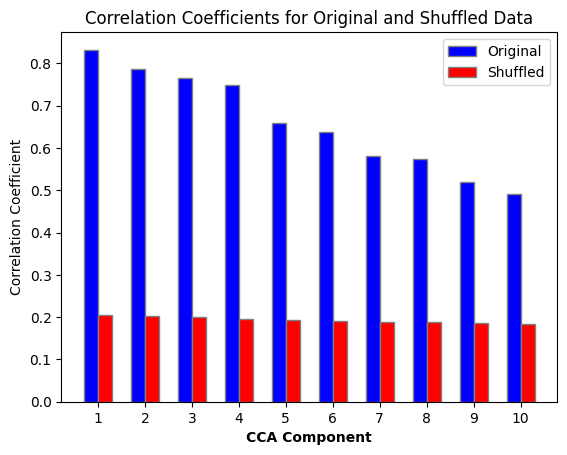

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Create an array with the positions of each bar along the x-axis
r1 = np.arange(len(correlations))
r2 = [x + 0.3 for x in r1]

# Create the figure and a set of axes
fig, ax = plt.subplots()

# Plot the bars
ax.bar(r1, correlations, width=0.3, color='b', edgecolor='grey', label='Original')
ax.bar(r2, correlations_shuffled, width=0.3, color='r', edgecolor='grey', label='Shuffled')

# Add xticks on the middle of the group bars
plt.xlabel('CCA Component', fontweight='bold')
plt.xticks([r + 0.15 for r in range(len(correlations))], range(1, len(correlations) + 1))

plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients for Original and Shuffled Data')
plt.legend()
plt.savefig('morphology_CCA.png')
# Show the figure
plt.show()


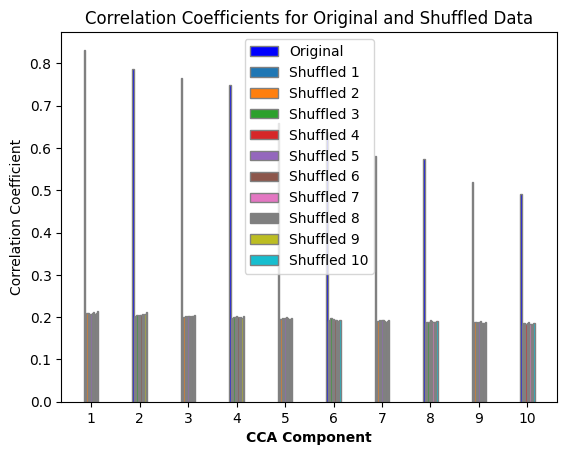

In [19]:
from sklearn.cross_decomposition import CCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume combined_df and word2vec_df are already defined and properly formatted.

# Initialize CCA
cca = CCA(n_components=10)

# Fit and transform the original data
cca.fit(combined_df.iloc[:, 1:], word2vec_df)
X_c, Y_c = cca.transform(combined_df.iloc[:, 1:], word2vec_df)

# Compute the correlations for the original data
correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]

# Initialize a list to hold the correlation lists from each shuffle
all_correlations = []

# Perform the shuffle 10 times
for shuffle_idx in range(10):
    word2vec_df_shuffled = word2vec_df.sample(frac=1).reset_index(drop=True)
    cca.fit(combined_df.iloc[:, 1:], word2vec_df_shuffled)
    X_c, Y_c = cca.transform(combined_df.iloc[:, 1:], word2vec_df_shuffled)
    correlations_shuffled = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
    all_correlations.append(correlations_shuffled)

# Create the figure and a set of axes
fig, ax = plt.subplots()

# Set up positions for the bars
r = np.arange(len(correlations))  # positions for the original data
width = 0.3 / (len(all_correlations) + 1)  # compute the width of each bar

# Plot the bars for the original correlations
ax.bar(r, correlations, width=width, color='b', edgecolor='grey', label='Original')

# Plot the bars for the shuffled correlations
for idx, corr in enumerate(all_correlations):
    ax.bar(r + width * (idx + 1), corr, width=width, edgecolor='grey', label=f'Shuffled {idx + 1}')

# Add xticks on the middle of the group bars
plt.xlabel('CCA Component', fontweight='bold')
plt.xticks([r + width * len(all_correlations) / 2 for r in range(len(correlations))], range(1, len(correlations) + 1))

plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients for Original and Shuffled Data')
plt.legend()
plt.savefig('morphology_CCA_multiple_shuffles.png')
plt.show()


In [16]:
morph_matrix = combined_df.iloc[:, 1:].to_numpy()
word2vec_embedding = word2vec_df.to_numpy()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations

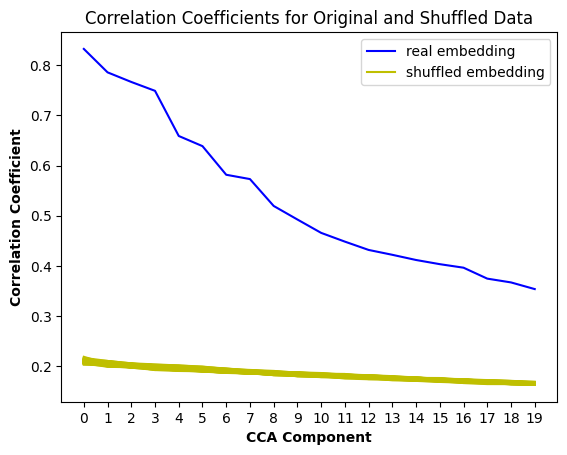

In [18]:
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.utils import shuffle
import numpy as np

def plot_cca(X, Y):
    # num of components
#     n_comps = min(X.shape[1], Y.shape[1])
    n_comps = 20
    cca = CCA(n_components=n_comps)
    cca.fit(X, Y)
    X_c1, Y_c1 = cca.transform(X, Y)
    corrs1 = [np.corrcoef(X_c1[:, i], Y_c1[:, i])[0, 1] for i in range(n_comps)] 
    plt.plot(corrs1,'-b',label='real embedding')
    i=0
    while i < 100:
        Y_shuffled = shuffle(Y)
        cca1 = CCA(n_components=n_comps)
        cca1.fit(X, Y_shuffled)
        X_c2, Y_c2 = cca1.transform(X, Y_shuffled)  
        corrs2 = [np.corrcoef(X_c2[:, i], Y_c2[:, i])[0, 1] for i in range(n_comps)]
        i +=1
        plt.plot(corrs2, '-y')
    plt.xticks(np.arange(n_comps))
    plt.plot(corrs2, '-y',label='shuffled embedding')
    plt.xlabel('CCA Component', fontweight='bold')
    plt.ylabel('Correlation Coefficient', fontweight='bold')
    plt.title('Correlation Coefficients for Original and Shuffled Data')
    plt.legend(loc="upper right")
    plt.savefig('morphology_CCA.png')
    plt.show()



    

plot_cca(morph_matrix, word2vec_embedding)

# words for Linear-decomposition

In [16]:
# Filter rows where the sum of all columns (except 'Word') equals 3 (i.e., words with exactly three suffixes)
combined_df_three_suffixes = combined_df[combined_df.iloc[:, 1:].sum(axis=1) == 3]
combined_df_three_suffixes.head(10)



,Word,a,able,acy,ade,age,al,ale,ance,ancy,ant,ar,ate,ater,dom,ee,eer,efy,en,er,ern,esc,ese,ess,est,et,ette,fold,ful,hood,i,ia,ian,ic,ice,ics,id,ide,ie,ify,ile,illion,ine,ion,ious,ish,ism,ist,it,ite,itis,itude,ity,ium,ive,ize,less,let,ling,ly,ment,n,ness,o,oid,on,or,ory,ose,ship,sis,some,ster,t,teen,th,ule,ure,us,ward,wise,y
17776,allegorically,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17778,whimsicality,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17779,whimsically,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17780,voyeuristically,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17781,weightier,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
17782,weightiest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
17783,weightily,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
17784,weightiness,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
17785,weightlessly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17786,veritably,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# Identify suffixes that occur less than 10 times
low_occurrence_suffixes = combined_df_three_suffixes.columns[1:][(combined_df_three_suffixes.iloc[:, 1:].sum() < 10)]

# Filter out rows where any of the low occurrence suffixes occur
filtered_df = combined_df_three_suffixes.drop(columns=low_occurrence_suffixes)
filtered_df = filtered_df.loc[:, (filtered_df != 0).any(axis=0)]
filtered_df


,Word,al,ance,ant,ate,er,ic,ion,ious,ism,ist,ity,ive,ize,ly,ment,or,y
17776,allegorically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
17778,whimsicality,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
17779,whimsically,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
17780,voyeuristically,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
17781,weightier,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18120,altruistically,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
18122,adventurously,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
18124,acoustically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
18125,activation,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [18]:
# Create a dictionary of word: root from the original dataframe
word_root_dict = pd.concat([df_sheet3, df_sheet4, df_sheet5])[['Word', 'MorphoLexSegm']].set_index('Word')['MorphoLexSegm'].apply(extract_root_and_all_suffixes).apply(lambda x: x[0]).to_dict()

# Map the words in the filtered dataframe to their roots
filtered_df['Root'] = filtered_df['Word'].map(word_root_dict)

# Display the dataframe with root words
filtered_df



,Word,al,ance,ant,ate,er,ic,ion,ious,ism,ist,ity,ive,ize,ly,ment,or,y,Root
17776,allegorically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,allegor
17778,whimsicality,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,whim
17779,whimsically,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,whim
17780,voyeuristically,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,voyeur
17781,weightier,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,weigh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18120,altruistically,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,altru
18122,adventurously,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,advent
18124,acoustically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,acoust
18125,activation,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,act


In [19]:
filtered_df.to_csv('278words_linear_decomposition.csv', index=False)

In [20]:
# Extract the 'Word' column from the filtered DataFrame
word_list = filtered_df['Word'].tolist()

# Join the words into a comma-separated string
formatted_words = ', '.join(word_list)

# Save the formatted words to a text file, which you can later copy to the appendix
with open('appendix_words.txt', 'w') as f:
    f.write(formatted_words)

# Alternatively, you can print it to the console for easy copying
print(formatted_words)


allegorically, whimsicality, whimsically, voyeuristically, weightier, weightiest, weightily, weightiness, weightlessly, veritably, visualizations, tyrannically, traitorously, transcendentally, transitionally, tangentially, temperamentally, surgically, structurally, studiously, studiousness, stylistically, spiritualistic, slipperiest, slipperiness, serviceability, serviceably, sectionalism, sentimentalism, sentimentalist, sentimentalized, sentimentalizes, sentimentalizing, sentimentally, serialization, serializations, satanically, reverentially, ritualistically, regularization, quizzically, rapturously, puritanically, probationers, probationer, psychiatrically, preferentially, practicably, practicalities, pleasurably, polarizations, phenomenally, personalizations, pessimistically, pathetically, occupationally, optionally, oratorically, nationalizations, nautically, neutralizer, neutralizers, mysteriously, mysteriousness, narcissistically, moralistically, melodiously, melodiousness, memo

In [29]:
# Create a new dataframe with root words as columns
root_df = pd.get_dummies(filtered_df['Root'])

# Concatenate the filtered dataframe with the root dataframe
final_df = pd.concat([filtered_df, root_df], axis=1)

# Drop the 'Root' column
final_df = final_df.drop(columns='Root')

final_df


,Word,al,ance,ant,ate,er,ic,ion,ious,ism,ist,ity,ive,ize,ly,ment,or,y,acoust,act,add,advent,allegor,altern,altru,anatom,anglo,antagon,apocalypse,architect,art,authent,behave,breath,brute,capit,catastrophe,categor,cens,center,cert,chauvin,chem,civil,class,collect,colon,commerce,communic,confide,conspire,converse,cumul,decim,decor,defer,define,demagog,demon,derive,develop,devi,dict,differ,direct,ecclesiast,econom,edit,educate,ego,electr,emote,empire,environ,episode,equi,evangel,exist,farce,fate,fict,figure,fluor,fract,future,gener,graph,harmon,heres,history,hyster,ideal,ident,imagine,incid,industry,infer,injure,journ,jur,just,lexic,liber,lingu,liqu,loc,long,material,mature,mechan,melod,memor,meter,morale,myst,narciss,nation,nature,naut,neg,neutr,norm,numer,occupy,oper,opt,orate,organ,particle,pater,patho,period,person,pessim,phenomen,phosphor,phys,please,pole,popul,pot,pract,prefer,press,prob,profess,prud,psycho,puritan,quiz,rapt,real,regul,relate,reside,rever,ritual,rotate,satan,satire,sci,sect,sense,senti,seri,serve,sign,slip,socio,soph,specul,spirit,struct,stud,style,surg,tang,tech,temper,theater,theor,trait,transcend,transit,tyran,un,urb,veri,victor,vis,voc,voyeur,weigh,west,whim
17776,allegorically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17778,whimsicality,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
17779,whimsically,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [30]:
# Get a boolean mask indicating the root columns
root_cols = final_df.columns[20:]

# Identify roots that occur less than 5 times
low_occurrence_roots = final_df[root_cols].sum() < 3
low_occurrence_roots = low_occurrence_roots[low_occurrence_roots].index

low_occurrence_roots


Index(['add', 'advent', 'allegor', 'altern', 'altru', 'anatom', 'anglo',
       'antagon', 'apocalypse', 'architect',
       ...
       'tyran', 'un', 'urb', 'veri', 'victor', 'vis', 'voc', 'voyeur', 'west',
       'whim'],
      dtype='object', length=149)

In [31]:
# Filter out rows where any of the low occurrence roots occur
final_df_filtered_roots = final_df.drop(columns=low_occurrence_roots)
final_df_filtered_roots = final_df_filtered_roots.loc[:, (final_df_filtered_roots != 0).any(axis=0)]
final_df_filtered_roots


,Word,al,ance,ant,ate,er,ic,ion,ious,ism,ist,ity,ive,ize,ly,ment,or,y,acoust,act,authent,capit,colon,confide,converse,dict,edit,educate,emote,environ,equi,exist,fict,liqu,mechan,memor,nation,neutr,pot,pract,prob,senti,soph,tech,transcend,weigh
17776,allegorically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17778,whimsicality,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17779,whimsically,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17780,voyeuristically,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17781,weightier,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18120,altruistically,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18122,adventurously,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18124,acoustically,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18125,activation,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
from gensim.models import KeyedVectors
import pandas as pd

# Load the Word2Vec model (you should have this loaded somewhere in your code as shown previously)
model = KeyedVectors.load_word2vec_format('./Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)

# Assume final_df_filtered_roots is already defined and properly formatted.
# Initialize a list to collect the Series
vectors = []

# Iterate through the words in your DataFrame
for word in final_df_filtered_roots['Word']:
    if word in model.index_to_key:
        vector = model[word]
        # Append the vector as a Series to the list
        vectors.append(pd.Series(vector))

# Create the DataFrame from the list of Series
word2vec_df = pd.DataFrame(vectors).reset_index(drop=True)


In [24]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.353516,0.003662,0.023071,-0.017944,-0.130859,0.176758,0.096680,0.205078,0.113281,0.096680,0.012939,-0.052490,-0.047852,0.223633,-0.214844,0.231445,-0.086426,0.283203,-0.022583,-0.142578,0.173828,-0.008362,0.018311,-0.052002,0.034180,-0.042725,0.014038,0.147461,0.009460,-0.053711,-0.153320,-0.073730,-0.229492,0.127930,0.060303,-0.021484,0.043701,0.135742,0.076172,-0.055176,0.357422,0.146484,0.250000,0.088867,0.137695,-0.022583,0.136719,-0.011841,-0.046387,0.084473,-0.156250,0.055420,-0.219727,-0.017700,0.275391,-0.037842,0.117188,-0.054688,-0.043213,-0.050537,0.439453,0.191406,0.038086,-0.139648,-0.131836,-0.115723,-0.232422,0.110840,-0.040527,0.019653,0.068359,-0.059326,-0.139648,-0.145508,-0.063965,-0.138672,0.105469,0.051025,0.178711,0.010620,0.045166,0.075684,-0.072754,-0.257812,-0.063477,0.164062,-0.113770,0.128906,0.197266,0.074707,-0.049805,-0.113770,-0.206055,0.024658,-0.022461,-0.068848,0.231445,-0.106934,0.193359,-0.310547,-0.061523,-0.003479,0.090820,-0.223633,0.134766,-0.106445,-0.195312,0.107910,-0.070801,-0.069824,-0.253906,0.121094,0.341797,0.043213,0.308594,-0.015625,-0.030273,-0.169922,0.149414,0.020630,-0.167969,-0.324219,0.138672,-0.269531,-0.220703,0.007080,-0.144531,0.273438,0.046143,0.006378,-0.116699,0.015503,-0.099121,0.027954,0.010071,0.194336,0.037354,-0.062012,-0.095703,-0.143555,0.324219,-0.005615,0.027466,0.129883,0.007172,-0.131836,-0.084473,0.124512,-0.103027,0.210938,-0.003448,0.022583,0.104004,-0.011169,-0.008789,-0.096680,-0.209961,-0.038330,-0.023315,-0.224609,0.036377,0.028442,0.170898,-0.232422,-0.019653,0.010010,0.141602,0.044189,-0.134766,0.125000,0.057129,-0.009155,-0.056152,-0.144531,0.136719,-0.071777,0.021484,-0.183594,-0.064453,-0.281250,-0.108398,-0.024536,-0.144531,-0.211914,-0.120605,-0.068848,-0.025269,-0.003448,0.029907,0.108398,-0.054932,-0.041992,0.016846,-0.015991,0.013550,0.096680,-0.246094,0.011047,-0.083008,0.062500,0.023804,0.090332,-0.062012,0.078613,-0.015991,-0.144531,-0.005096,0.082520,-0.285156,-0.060059,-0.257812,0.022461,-0.017700,-0.177734,-0.237305,0.132812,0.045654,-0.031982,0.166992,-0.234375,-0.008972,0.204102,0.125000,-0.099609,0.104004,-0.049316,-0.070801,0.033691,0.124512,0.049316,0.125000,-0.156250,-0.275391,0.115234,0.190430,-0.083496,-0.069824,0.127930,0.171875,-0.009766,0.133789,-0.148438,0.034424,0.039307,0.071777,0.006897,0.038086,0.204102,-0.347656,0.172852,-0.062500,-0.047119,-0.033936,0.127930,0.116699,-0.275391,-0.191406,-0.185547,0.124512,0.112793,-0.159180,0.072754,-0.040283,-0.043213,-0.219727,0.126953,0.126953,-0.054688,-0.028931,-0.100098,-0.028931,0.069824,-0.037598,0.244141,0.170898,0.064453,-0.201172,0.020020,-0.099609,0.141602,0.140625,-0.001839,-0.033936,-0.013794,0.175781,0.161133,-0.296875,-0.116699,-0.208984,-0.004303,-0.195312,0.102051,-0.124512,-0.042236,-0.156250,-0.043457,0.036865,-0.191406,-0.058105,0.105469
1,0.141602,-0.020630,-0.037598,0.172852,-0.104492

In [34]:
# Remove the 'Word' column and convert the dataframe to a numpy array
word_boolean_embedding = final_df_filtered_roots.drop(columns='Word').values
word_boolean_embedding.shape


(278, 45)

In [35]:
word_embedding = word2vec_df.values
word_embedding.shape

(278, 300)

In [38]:
word_boolean_embedding = word_boolean_embedding.astype(float)


# L2 Norm

In [39]:
attribute_embedding = np.linalg.pinv(word_boolean_embedding).dot(word_embedding)

In [40]:
B = np.dot(word_boolean_embedding, attribute_embedding)

In [46]:
np.random.seed(2)

In [47]:
from sklearn.utils import shuffle
from numpy.linalg import norm

i = 0
r_norm = []
while i < 100:
    word_embedding_shuffled = shuffle(word_embedding)
    attribute_embedding_shuffled = np.linalg.pinv(word_boolean_embedding).dot(word_embedding_shuffled)
    B_shuffled = np.dot(word_boolean_embedding, attribute_embedding_shuffled)
    r_norm.append(norm(B_shuffled - word_embedding_shuffled))
    i = i+1
r_norm

[44.15111530438642,
 44.51847632404287,
 44.26749586256604,
 44.46728631515016,
 44.32320740589219,
 44.458892037570706,
 44.30462389146211,
 44.25149225340597,
 44.65376659368246,
 44.1353239326999,
 44.36818330420382,
 44.1762202548531,
 44.49310319317541,
 44.25114051116889,
 44.30352372345641,
 44.5300729146014,
 44.54740818771865,
 44.23496893980198,
 44.254988822729956,
 44.41893299713448,
 44.29262355539517,
 44.36649179488358,
 44.34917992252527,
 44.29720489195899,
 44.17422541804869,
 44.17577452573716,
 44.176380975243625,
 43.913149758489396,
 44.080714879564255,
 44.28118220627034,
 44.30250182994659,
 44.472773017965054,
 44.32116402427196,
 44.35706463006513,
 44.37714499118005,
 44.38545071797411,
 44.29108617433076,
 44.2775002731808,
 44.20234652171343,
 44.52514390859304,
 44.005866895904695,
 44.28866124104531,
 44.265906466045564,
 44.53319030305702,
 44.22806977692968,
 44.18562402099376,
 44.22930776702162,
 44.41478088823397,
 44.27967249951217,
 44.371119551682

In [48]:
min(r_norm), max(r_norm)

(43.913149758489396, 44.65376659368246)

In [49]:
real_norm = norm(B - word_embedding)
real_norm

39.8473255227976

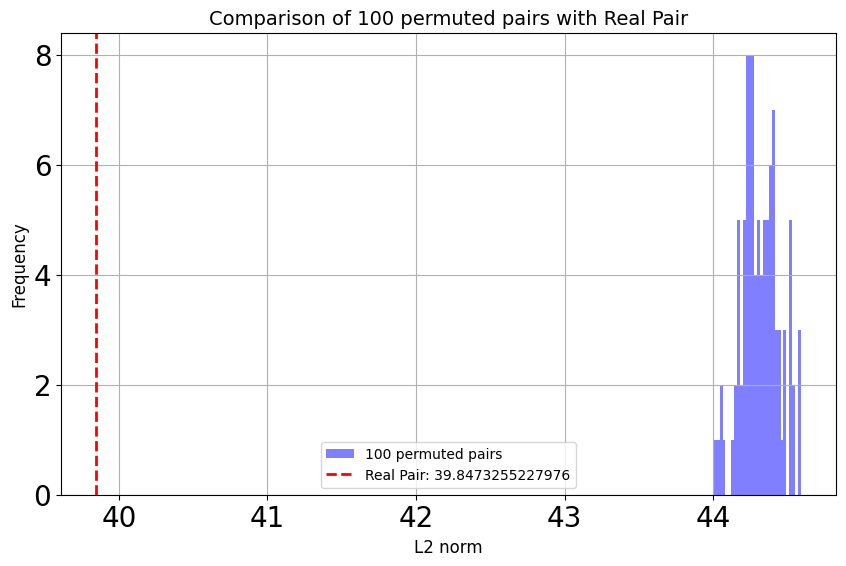

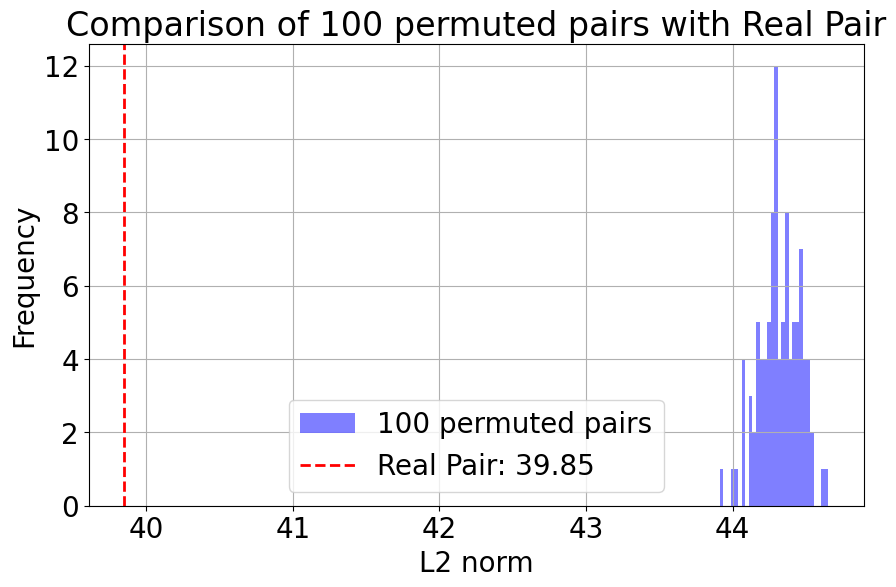

In [51]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(r_norm, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(real_norm, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {real_norm:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('L2 norm')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('word2vec_L2.png')
plt.show()



# Cosine Similarity

In [52]:
real_similarities = []
attribute_embedding = []
for i in range(100):
    # Select a random word to remove
    removed_word_index = i
    
    # Remove the selected word from both matrices
    word_embedding1 = np.delete(word_embedding, removed_word_index, axis=0)
    word_boolean_embedding1 = np.delete(word_boolean_embedding, removed_word_index, axis=0)

    # Compute the attribute_embedding using the remaining words
    attribute_embedding = np.linalg.pinv(word_boolean_embedding1).dot(word_embedding1)

    # Compute the predicted embedding for the removed word
    removed_word = np.dot(word_boolean_embedding[removed_word_index], attribute_embedding)

    # Compute the similarity between the predicted embedding and the real embedding
    real_word_embedding = word_embedding[removed_word_index]
    similarity = np.dot(removed_word, real_word_embedding) / (np.linalg.norm(removed_word) * np.linalg.norm(real_word_embedding))
    similarity = np.clip(similarity, -1, 1)
    real_similarities.append(similarity)

mean_real_similarity = np.mean(real_similarities)
print("Mean similarity with real embeddings:", np.mean(real_similarities))


Mean similarity with real embeddings: 0.438480301739996


In [60]:
np.random.seed(2)

In [61]:
num_permutations = 100
sum1= 0
cosine_similarities = []
for j in range(num_permutations):
    mean_for_1 = []
    for i in range(100):
        shuffled_embedding = shuffle(word_embedding)
        removed_word_index = i

        # Remove the selected word from both matrices
        word_embedding1 = np.delete(shuffled_embedding, removed_word_index, axis=0)
        word_boolean_embedding1 = np.delete(word_boolean_embedding, removed_word_index, axis=0)

        # Compute the attribute_embedding using the remaining words
        attribute_embedding = np.linalg.pinv(word_boolean_embedding1).dot(word_embedding1)

        # Compute the predicted embedding for the removed word
        removed_word = np.dot(word_boolean_embedding[removed_word_index], attribute_embedding)
        real_word_embedding = shuffled_embedding[removed_word_index]
        permuted_cosine_similarity = np.dot(removed_word, real_word_embedding) / (np.linalg.norm(removed_word) * np.linalg.norm(real_word_embedding))
        permuted_cosine_similarity = np.clip(permuted_cosine_similarity, -1, 1)
        mean_for_1.append(permuted_cosine_similarity)
    count = sum(1 for x in mean_for_1 if x > mean_real_similarity)
    sum1 = sum1 + count

    cosine_similarities.append(np.mean(mean_for_1))
cosine_similarities


[0.2535193001171064,
 0.2505565994039711,
 0.25623226136932553,
 0.2546226805363389,
 0.28343171134283063,
 0.26565798073737384,
 0.27632557303677613,
 0.2683766020569871,
 0.26924732599735784,
 0.24427852137033454,
 0.27020753299265193,
 0.2685350299051169,
 0.26193143224744253,
 0.26683955076068355,
 0.2637179242916161,
 0.25277073278739726,
 0.2753052581713747,
 0.2602857894156186,
 0.2827875990253407,
 0.25240858365367935,
 0.2541508340158874,
 0.25317829637220907,
 0.25407111013544936,
 0.24057662749818512,
 0.2571923225920651,
 0.24794835300940718,
 0.26999233928989463,
 0.283644513016984,
 0.27297936715011745,
 0.2598427290005454,
 0.27179532802502077,
 0.25831782268068976,
 0.26228264755454583,
 0.27594629991347797,
 0.2845782266848038,
 0.2545659962345152,
 0.2579337413798978,
 0.26825873141584367,
 0.24933850500078786,
 0.2813817172939748,
 0.253175076333701,
 0.2554985484757762,
 0.2517132085924237,
 0.26989640859983655,
 0.25203183019845143,
 0.27475978658878547,
 0.2527172

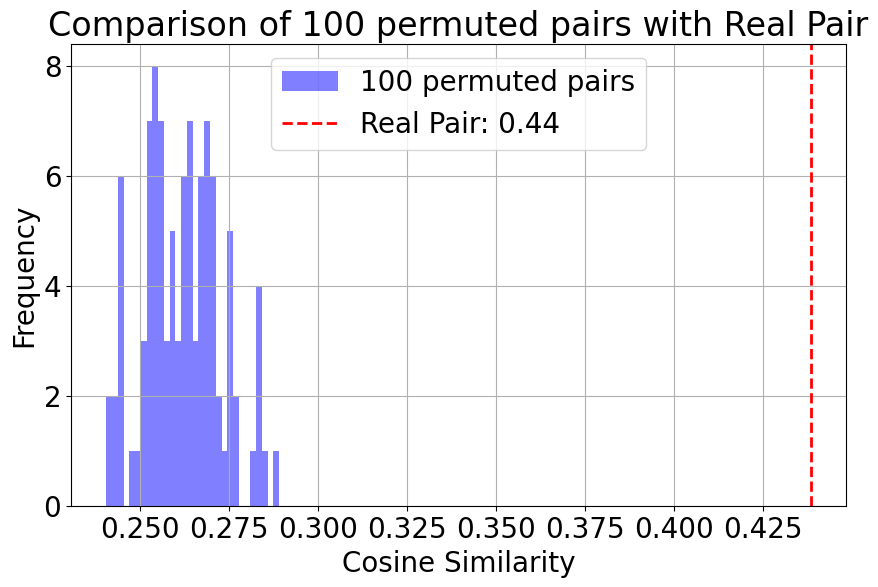

In [62]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(cosine_similarities, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(mean_real_similarity, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {mean_real_similarity:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('word2vec_cos.png')
plt.show()


# Retrival Accuracy

In [63]:
from sklearn.metrics.pairwise import cosine_similarity


num_words = word_embedding.shape[0]
num_trials = 100
count = 0

for i in range(num_trials):
    # Select a random word to remove
    removed_word_index = i

    # Remove the selected word from both matrices
    word_embedding1 = np.delete(word_embedding, removed_word_index, axis=0)
    word_boolean_embedding1 = np.delete(word_boolean_embedding, removed_word_index, axis=0)

    # Compute the attribute_embedding using the remaining words
    attribute_embedding = np.linalg.pinv(word_boolean_embedding1).dot(word_embedding1)

    # Compute the predicted embedding for the removed word
    removed_word = np.dot(word_boolean_embedding[removed_word_index], attribute_embedding)

    # Compute the cosine similarity between the predicted embedding and all word embeddings
    similarities = cosine_similarity(word_embedding, [removed_word]).flatten()
    # Get the index of the word with highest cosine similarity
    highest_sim_index = np.argmax(similarities)
    # Check if the index matches the removed word
    if highest_sim_index == removed_word_index:
        count += 1

# Compute the accuracy
accuracy_real = count / num_trials
print("Accuracy:", accuracy_real)


Accuracy: 0.01


In [64]:
np.random.seed(2)

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

num_words = word_embedding.shape[0]
num_trials = 100
count = 0

for i in range(num_trials):
    # Select a random word to remove
    removed_word_index = i

    # Remove the selected word from both matrices
    word_embedding1 = np.delete(word_embedding, removed_word_index, axis=0)
    word_boolean_embedding1 = np.delete(word_boolean_embedding, removed_word_index, axis=0)

    # Compute the attribute_embedding using the remaining words
    attribute_embedding = np.linalg.pinv(word_boolean_embedding1).dot(word_embedding1)

    # Compute the predicted embedding for the removed word
    removed_word = np.dot(word_boolean_embedding[removed_word_index], attribute_embedding)

    # Compute the cosine similarity between the predicted embedding and all word embeddings
    similarities = cosine_similarity(word_embedding, [removed_word]).flatten()

    # Get the indices of the top 5 words with highest cosine similarity
    top_10_sim_indices = np.argpartition(similarities, -10)[-10:]

    # Check if the index of the removed word is in the top 5
    if removed_word_index in top_10_sim_indices:
        count += 1

# Compute the accuracy
accuracy_real = count / num_trials
print("Hits@10 Accuracy:", accuracy_real)


Hits@10 Accuracy: 0.33


In [68]:
np.random.seed(2)

In [69]:
num_words = word_embedding.shape[0]
num_trials = 100
accuracies= []
for i in range(100):
    count_for_1 = 0
    for j in range(num_trials):
        shuffled_embedding = shuffle(word_embedding)
        # Select a random word to remove
        removed_word_index = j

        # Remove the selected word from both matrices
        word_embedding1 = np.delete(shuffled_embedding, removed_word_index, axis=0)
        word_boolean_embedding1 = np.delete(word_boolean_embedding, removed_word_index, axis=0)

        # Compute the attribute_embedding using the remaining words
        attribute_embedding = np.linalg.pinv(word_boolean_embedding1).dot(word_embedding1)

        # Compute the predicted embedding for the removed word
        removed_word = np.dot(word_boolean_embedding[removed_word_index], attribute_embedding)

        # Compute the cosine similarity between the predicted embedding and all word embeddings
        similarities = cosine_similarity(shuffled_embedding, [removed_word]).flatten()
        # Get the indices of the top 5 words with highest cosine similarity
        top_10_sim_indices = np.argpartition(similarities, -10)[-10:]
        # Check if the index matches the removed word
        # Check if the index of the removed word is in the top 5
        if removed_word_index in top_10_sim_indices:
            count_for_1 += 1
    accuracy = count_for_1 / num_trials
    accuracies.append(accuracy)
accuracies


[0.0,
 0.02,
 0.01,
 0.02,
 0.05,
 0.02,
 0.03,
 0.04,
 0.03,
 0.01,
 0.02,
 0.02,
 0.02,
 0.02,
 0.03,
 0.02,
 0.04,
 0.02,
 0.02,
 0.0,
 0.02,
 0.02,
 0.02,
 0.03,
 0.02,
 0.04,
 0.04,
 0.03,
 0.01,
 0.01,
 0.02,
 0.01,
 0.07,
 0.02,
 0.03,
 0.0,
 0.01,
 0.01,
 0.0,
 0.04,
 0.02,
 0.0,
 0.03,
 0.0,
 0.0,
 0.02,
 0.01,
 0.02,
 0.01,
 0.03,
 0.05,
 0.07,
 0.05,
 0.01,
 0.05,
 0.01,
 0.01,
 0.02,
 0.02,
 0.03,
 0.02,
 0.0,
 0.03,
 0.04,
 0.05,
 0.04,
 0.04,
 0.01,
 0.03,
 0.02,
 0.05,
 0.01,
 0.02,
 0.03,
 0.03,
 0.0,
 0.04,
 0.02,
 0.04,
 0.04,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.01,
 0.01,
 0.03,
 0.01,
 0.01,
 0.02,
 0.01,
 0.03,
 0.03,
 0.01,
 0.02,
 0.0,
 0.01,
 0.02,
 0.02]

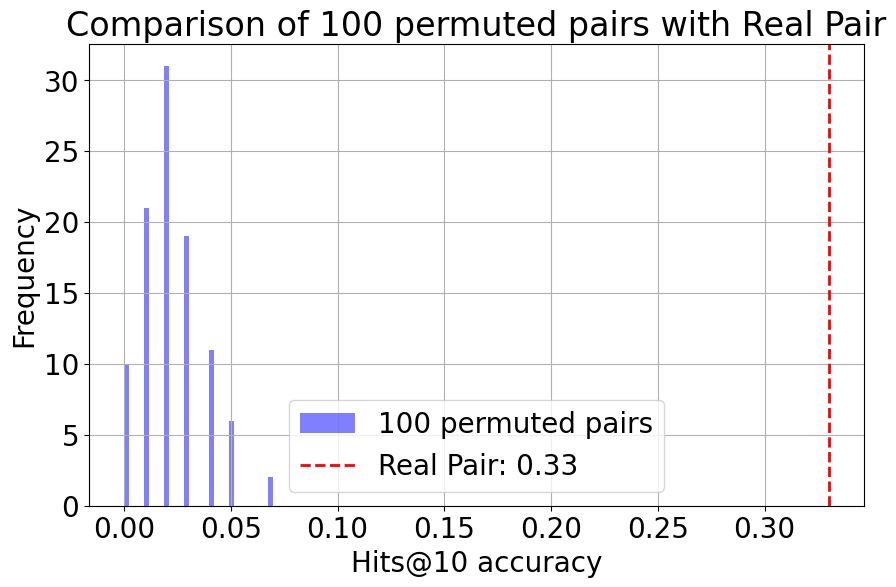

In [70]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(accuracies, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(accuracy_real, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {accuracy_real:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('Hits@10 accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('word2vec_hits10.png')
plt.show()